# Covid-19 EDA (Exploratory Data Analysis)

## Workflow Stages
1. Question or problem definition.
1. Accquire training and testing data.
1. Wrangle, prepare, cleanse the data.
1. Analyze, identify patterns, and explore the data.
1. Conclusion

### Question or Problem Defination


#### Give the estimation of death statewise with all doses and population 


1. Analyze the association between the number of doses taken and the number of deaths in each state.


2. Calculate the growth rate of confirmed cases and death rate by state.


3. Calculate the distribution of doses among the population of each state.


4. Compare the population of each state based on the different doses taken.


Estimate the relationship between following <br>


- deaths with state, dose1, dose2, dose3, and precaution<br>

- state with the highest and lowest of  death,active, dose1, dose2, dose3, precaution dose, and population
 

In [1]:
# data analysis and wranglin
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%reload_ext autoreload
%autoreload 2

---

### Acquire data

In [20]:
covid = pd.read_csv('covid.csv')
covid

,state,confirmed,active,passive,deaths,dose1,dose2,dose3,precaution_dose,total_doses,population
0,Andaman and Nicobar,10742,1,10612,129,313284,320383,236936,53427,991263,426251
1,Andhra Pradesh,2339067,3,2324331,14733,40643161,43549055,11703273,6579565,110556756,52883163
2,Arunachal Pradesh,66890,0,66594,296,860442,747177,72403,58618,1911760,1528296
3,Assam,746100,0,738065,8035,22549957,20561790,2082670,1259853,50284713,34586234
4,Bihar,851379,15,839062,12302,62944633,59144387,11983504,3868082,157197041,119461013
5,Chandigarh,99348,6,98161,1181,1089254,917701,48480,63046,2282281,1182104
6,Chhattisgarh,1177749,6,1163597,14146,18955635,18534989,5737679,1804891,49148991,28566990
7,Dadra and Nagar Haveli and Daman and Diu,11591,0,11587,4,730746,594929,136967,22486,1578492,657391
8,Delhi,2007188,35,1980632,26521,16600054,14348835,2312803,1053393,37366540,18802494
9,Goa,259079,26,255040,4013,1354828,1224173,60838,76559,2872582,1542750


---

### Analyze by describing data

In [3]:
# Which features are available in the dataset?
print(covid.columns.values)

['state' 'confirmed' 'active' 'passive' 'deaths' 'dose1' 'dose2' 'dose3'
 'precaution_dose' 'total_doses' 'population']


Categorical features are 

- Our data is statewise so has no categorical features.so Categorical Values: None


Numerical feature are 

- Continous Values: confirmed, active, passive, deaths, dose1, dose2, dose3, precaution_dose, total_doses, population

In [4]:
# preview the data
covid.head()

,state,confirmed,active,passive,deaths,dose1,dose2,dose3,precaution_dose,total_doses,population
0,Andaman and Nicobar,10742,1,10612,129,313284,320383,236936,53427,991263,426251
1,Andhra Pradesh,2339067,3,2324331,14733,40643161,43549055,11703273,6579565,110556756,52883163
2,Arunachal Pradesh,66890,0,66594,296,860442,747177,72403,58618,1911760,1528296
3,Assam,746100,0,738065,8035,22549957,20561790,2082670,1259853,50284713,34586234
4,Bihar,851379,15,839062,12302,62944633,59144387,11983504,3868082,157197041,119461013


Which features are mixed data types?

- There is no feature of mixed data type.


Which features may contain error or typos?

- State feature may contain error or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names.

Which features contain blank, null or empty values?

- There is no such feature.


What are the data types for various features?

- 10 features are integer

- 1 feature is string(object)

In [5]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   state            36 non-null     object
 1   confirmed        36 non-null     int64 
 2   active           36 non-null     int64 
 3   passive          36 non-null     int64 
 4   deaths           36 non-null     int64 
 5   dose1            36 non-null     int64 
 6   dose2            36 non-null     int64 
 7   dose3            36 non-null     int64 
 8   precaution_dose  36 non-null     int64 
 9   total_doses      36 non-null     int64 
 10  population       36 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 3.2+ KB


#### ***Assumptions based on the data analysis***
following assumptions based on the data analysis done so far.


**Correlating**<br>
- We want to know how well does each feature correlate with Deaths.


**Completing**<br>

1. We may want to complete the dose feature as it is definitely correlated with death.

1. We may want to complete the active feature as it my also correlate with death.


**Correcting**<br>

1. state feature is relatively non-standard, may not contribute directly to deaths, so maybe droped.


**Creating**<br>


1. We may want to create a new feature called real_total_dose based on the dose1, dose2, dose3, precaution_dose to get the total count of all 3 doses.


**Classifying**<br>

We may also add to our assumptions based on the probelm description noted earlier.

1. Population range of state 
1. total_doses
1. active cases in each state

### Analyze by pivoting features

To confirm some of our observations and assumption, we can analyze our feature correlation by pivoting features against each other.

In [6]:
# relationship between death and state
data = pd.DataFrame()
data['deaths'] = covid.sort_values('deaths',ascending=False).deaths.values[:10]
data['state'] = covid.sort_values('deaths',ascending=False).state.values[:10]

In [7]:
# relationship between death and population 
population = pd.DataFrame()
population['population'] = covid.sort_values('population',ascending=False).population.values[:10]
population['state'] = covid.sort_values('population',ascending=False).state.values[:10]

In [8]:
cases = pd.DataFrame()
cases['state'] = covid.sort_values(by='confirmed',ascending=False).state.values[:10]
cases['case1'] = covid.sort_values(by='confirmed',ascending=False).confirmed.values[:10]

In [9]:
dose = pd.DataFrame()
dose['total_dose'] = covid['dose1'] + covid['dose2'] + covid['dose3'] + covid['precaution_dose']
covid[['dose1','dose2','dose3','precaution_dose','total_doses','deaths']].corr()

,dose1,dose2,dose3,precaution_dose,total_doses,deaths
dose1,1.000000,0.997478,0.886536,0.913766,0.995872,0.501551
dose2,0.997478,1.000000,0.908188,0.930180,0.998916,0.461720
dose3,0.886536,0.908188,1.000000,0.897297,0.922680,0.157094
precaution_dose,0.913766,0.930180,0.897297,1.000000,0.928383,0.403252
total_doses,0.995872,0.998916,0.922680,0.928383,1.000000,0.439675
deaths,0.501551,0.461720,0.157094,0.403252,0.439675,1.000000


---

### Analyze by visualizing data
Now we can continue confirming some of our assumptions using visualization for analyzing the data

<Figure size 1400x800 with 0 Axes>

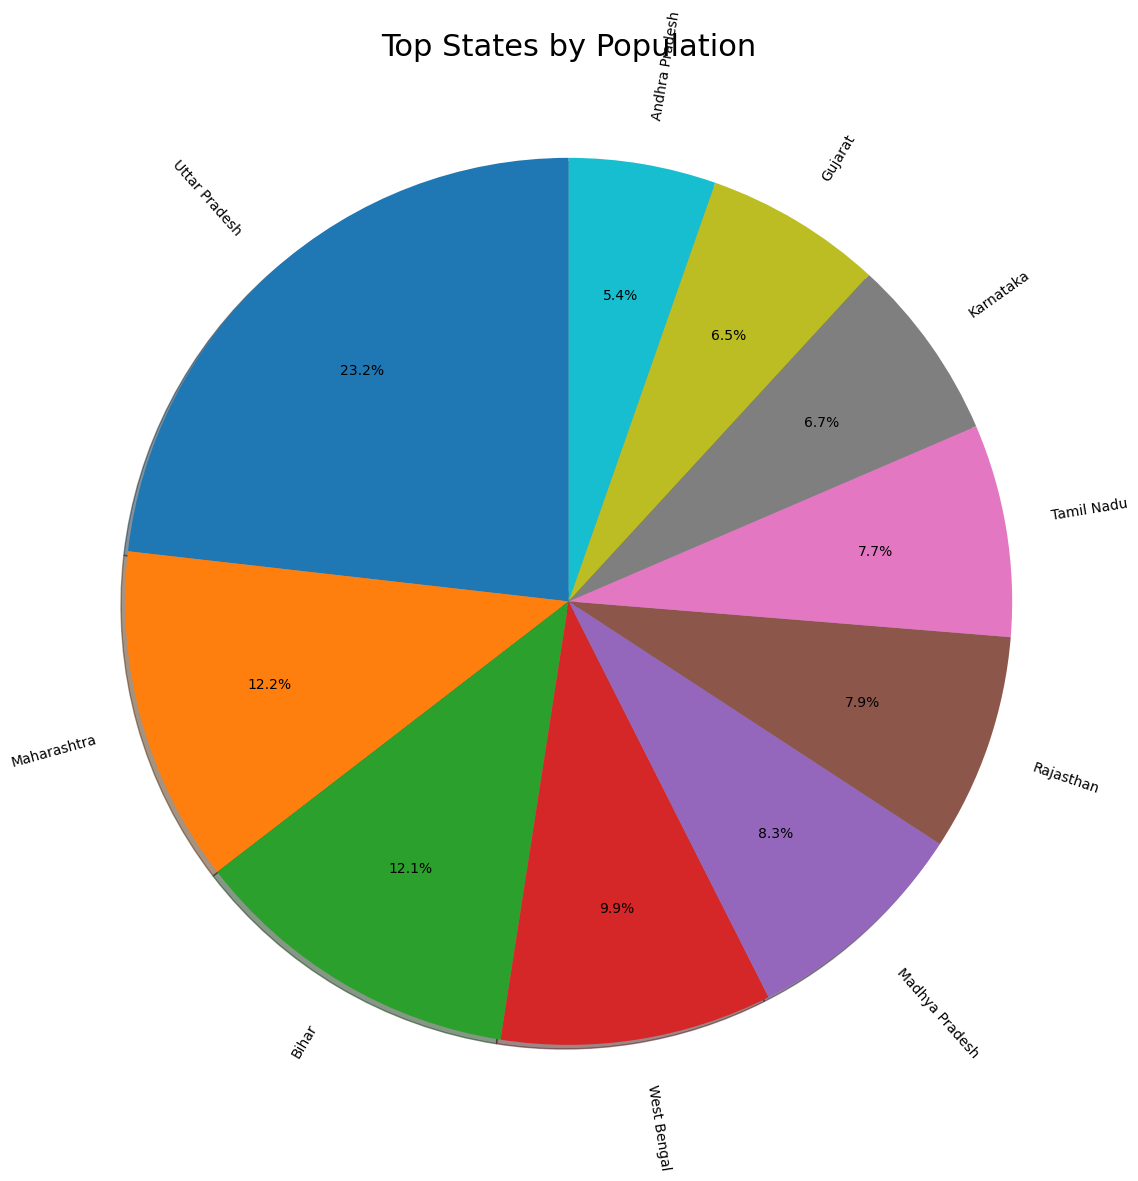

In [10]:
# Top 10 states having the higest population
states,values = population['state'],population['population']
plt.figure(figsize=(14,8))
fig,ax1 = plt.subplots()
title={'fontsize':22,'fontweight':55,'horizontalalignment':'center'}
plt.title("Top States by Population",fontdict=title,pad=260)
ax1.pie(values,labels=states,autopct='%1.1f%%',pctdistance=.7,rotatelabels=40,shadow=True,radius=3,startangle=90)
plt.show()

<Figure size 1400x800 with 0 Axes>

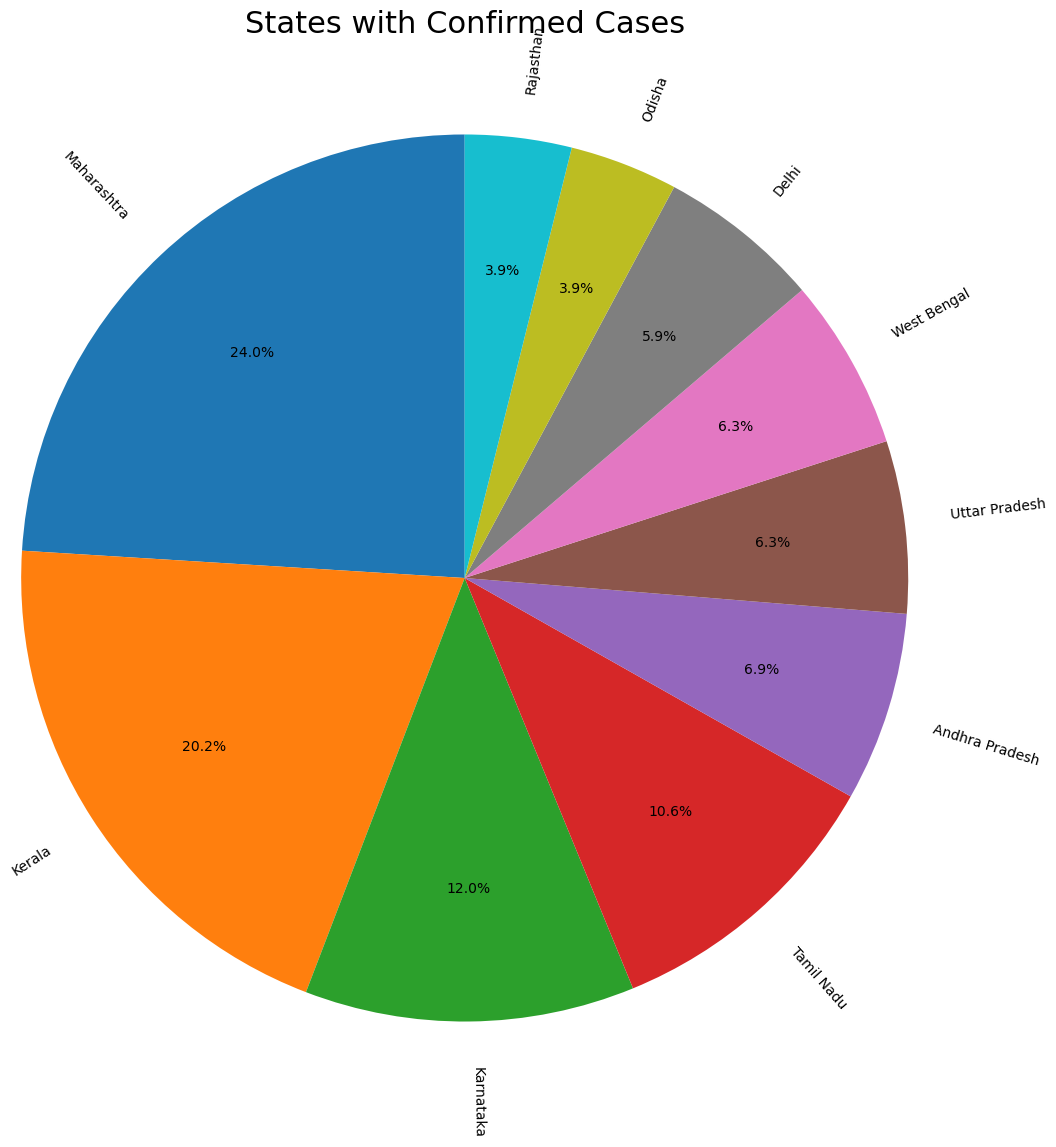

In [11]:
# Top 10 states having the confirmed cases
case1,state = cases['case1'],cases['state']
plt.figure(figsize=(14,8))
fig,ax2 = plt.subplots()
title={'fontsize':22,'fontweight':55,'horizontalalignment':'center'}
plt.title("States with Confirmed Cases",fontdict=title,pad=260)
ax2.pie(case1,labels=state,radius=3,autopct='%1.1f%%',pctdistance=.7,rotatelabels=30,startangle=90)
plt.show()

<Figure size 1400x800 with 0 Axes>

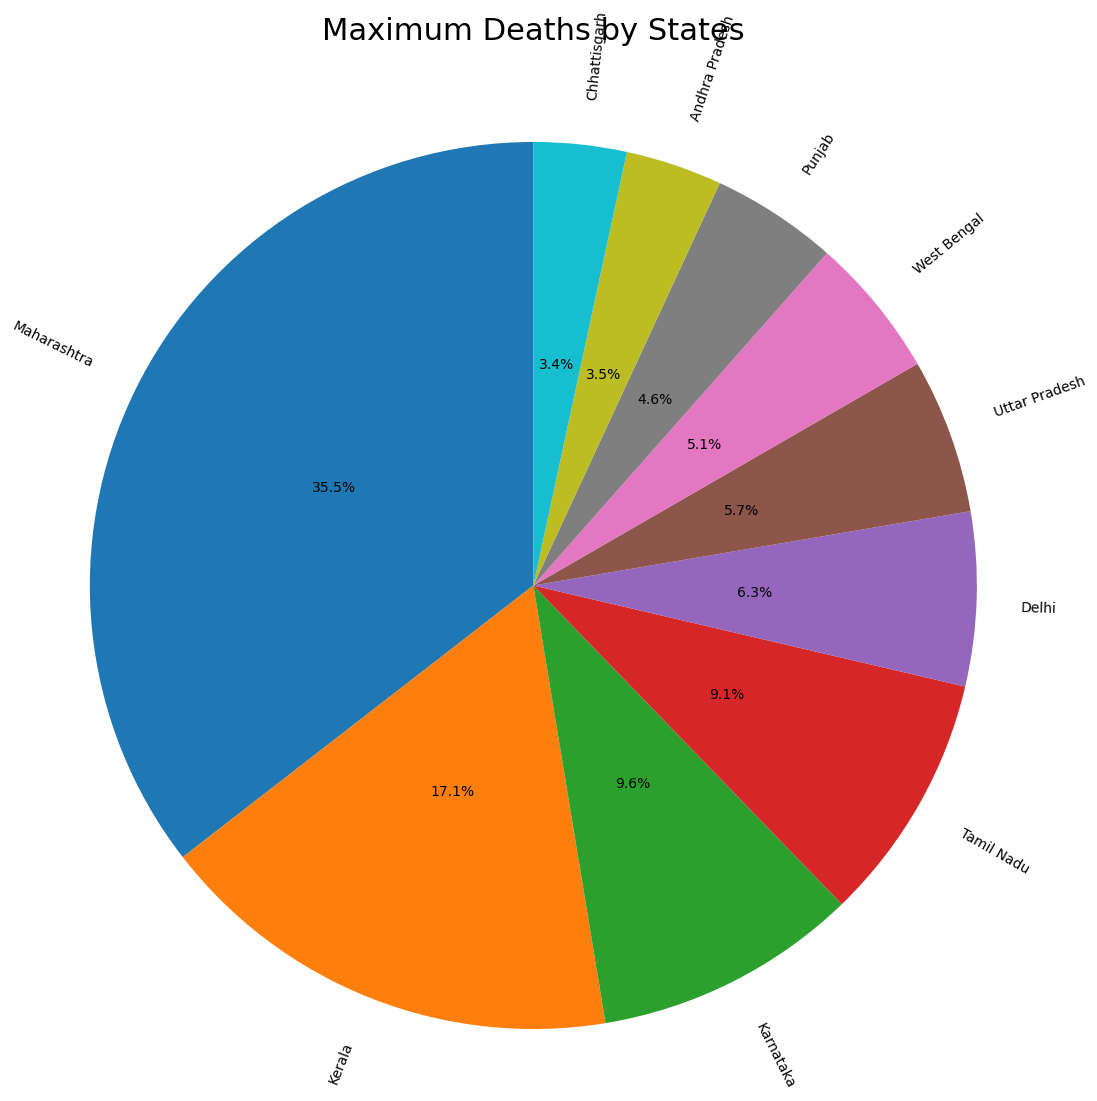

In [12]:
# Top 10 states having the higest death count
deaths,state=data['deaths'],data['state']
plt.figure(figsize=(14,8))
fig,ax3 = plt.subplots()
title={'fontsize':22,'fontweight':55,'horizontalalignment':'center'}
plt.title("Maximum Deaths by States",fontdict=title,pad=260)
ax3.pie(deaths,labels=state,radius=3,autopct='%1.1f%%',pctdistance=.5,counterclock=True,rotatelabels=30,startangle=90)
plt.show()

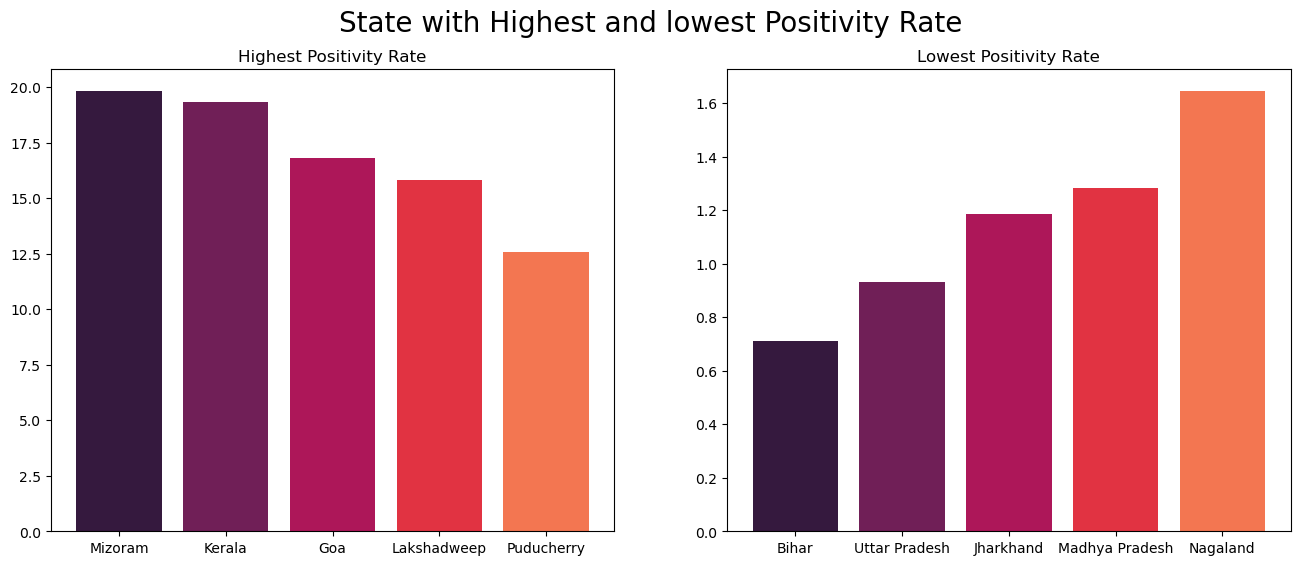

In [13]:
# Which states have highest and lowest Postivity Rate
covid['Positivity rate'] = covid['confirmed']*100/covid['population']
states_pos_high = covid.sort_values(by='Positivity rate',ascending=False)['state'].values[:5] # 
states_pos_least = covid.sort_values(by='Positivity rate',ascending=True)['state'].values[:5]

high_PR = []
low_PR = []
for i,a in zip(states_pos_high,states_pos_least):
  high_PR.append(covid[covid['state'] == str(i)]['Positivity rate'].values[0])
  low_PR.append(covid[covid['state'] == str(a)]['Positivity rate'].values[0])

# chart
fig,ax4 = plt.subplots(nrows=1,ncols=2,figsize=(16,6))
fig.suptitle("State with Highest and lowest Positivity Rate",fontsize=20)
ax4[0].set_title("Highest Positivity Rate")
ax4[1].set_title("Lowest Positivity Rate")
colr = sns.color_palette('rocket')
ax4[1].bar(states_pos_least,low_PR,color=colr)
ax4[0].bar(states_pos_high,high_PR,color=colr)
plt.show()

C:\Users\25472\AppData\Local\Temp\ipykernel_11332\2187401517.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4[0].set_xticklabels(states_death_high,rotation=90)
C:\Users\25472\AppData\Local\Temp\ipykernel_11332\2187401517.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4[1].set_xticklabels(states_death_least,rotation=90)


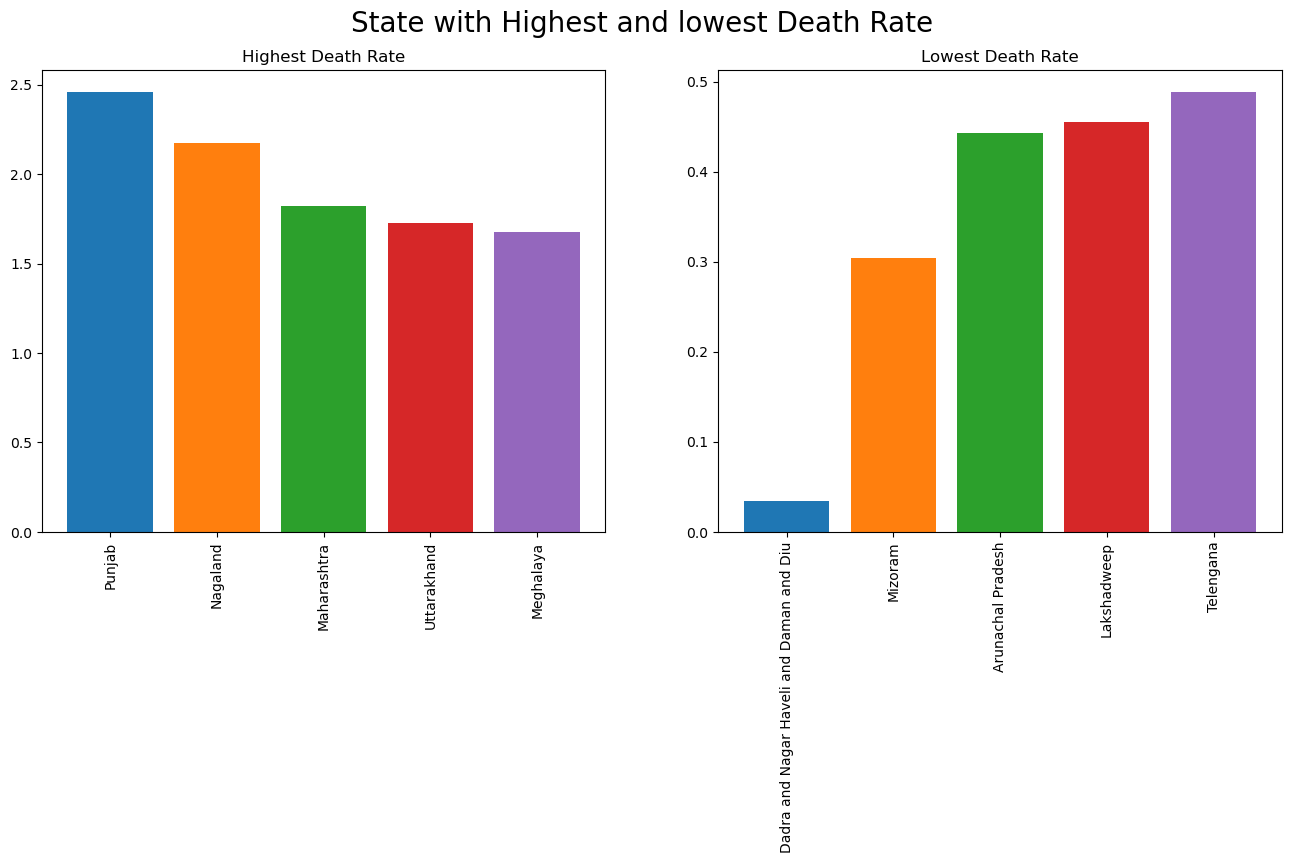

In [14]:
# Which states have highest and lowest Death Rate
covid['Death rate'] = covid['deaths']*100/covid['confirmed']
states_death_high = covid.sort_values(by='Death rate',ascending=False)['state'].values[:5] # 
states_death_least = covid.sort_values(by='Death rate',ascending=True)['state'].values[:5]

high_DR = []
low_DR = []
for i,a in zip(states_death_high,states_death_least):
  high_DR.append(covid[covid['state'] == str(i)]['Death rate'].values[0])
  low_DR.append(covid[covid['state'] == str(a)]['Death rate'].values[0])

# chart
fig,ax4 = plt.subplots(nrows=1,ncols=2,figsize=(16,6))
fig.suptitle("State with Highest and lowest Death Rate",fontsize=20)
ax4[0].set_title("Highest Death Rate")
ax4[1].set_title("Lowest Death Rate")
colr = sns.color_palette('tab10')
ax4[0].bar(states_death_high,high_DR,color=colr)
ax4[0].set_xticklabels(states_death_high,rotation=90)
ax4[1].set_xticklabels(states_death_least,rotation=90)
ax4[1].bar(states_death_least,low_DR,color=colr)

plt.show();

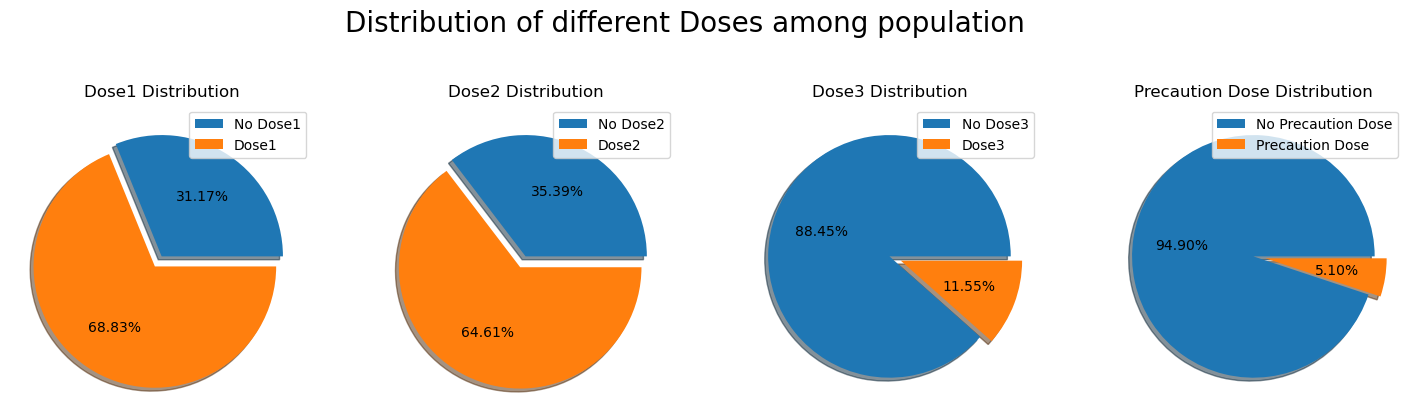

In [15]:
# Population vaccinated according to the doses

pop = covid.sum()['population']
dose1 = covid.sum()['dose1']
dose2 = covid.sum()['dose2']
dose3 = covid.sum()['dose3']
dose4 = covid.sum()['precaution_dose']

fig, ax1 = plt.subplots(1,4,figsize=(18,5.1))
fig.suptitle("Distribution of different Doses among population",fontsize=20)
ax1[0].pie(x=[pop - dose1,dose1],shadow=True,autopct='%1.2f%%',explode=(0,0.1))
ax1[0].set_title('Dose1 Distribution')
ax1[0].legend(['No Dose1','Dose1'],loc=1)

ax1[1].pie(x=[pop - dose2,dose2],autopct='%1.2f%%',shadow=True,explode=(0,0.1))
ax1[1].set_title('Dose2 Distribution')
ax1[1].legend(['No Dose2','Dose2'])

ax1[2].pie(x=[pop - dose3,dose3],autopct='%1.2f%%',explode=(0,0.1),shadow=True)
ax1[2].set_title('Dose3 Distribution')
ax1[2].legend(['No Dose3','Dose3'],loc=0)

ax1[3].pie(x=[pop - dose4,dose4],autopct='%1.2f%%',explode=(0,0.1),shadow=True)
ax1[3].set_title('Precaution Dose Distribution')
ax1[3].legend(['No Precaution Dose','Precaution Dose'],loc=0)

plt.show()

C:\Users\25472\AppData\Local\Temp\ipykernel_11332\1389949574.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(state_dose_least,rotation=90)
C:\Users\25472\AppData\Local\Temp\ipykernel_11332\1389949574.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(state_dose_most,rotation=90)


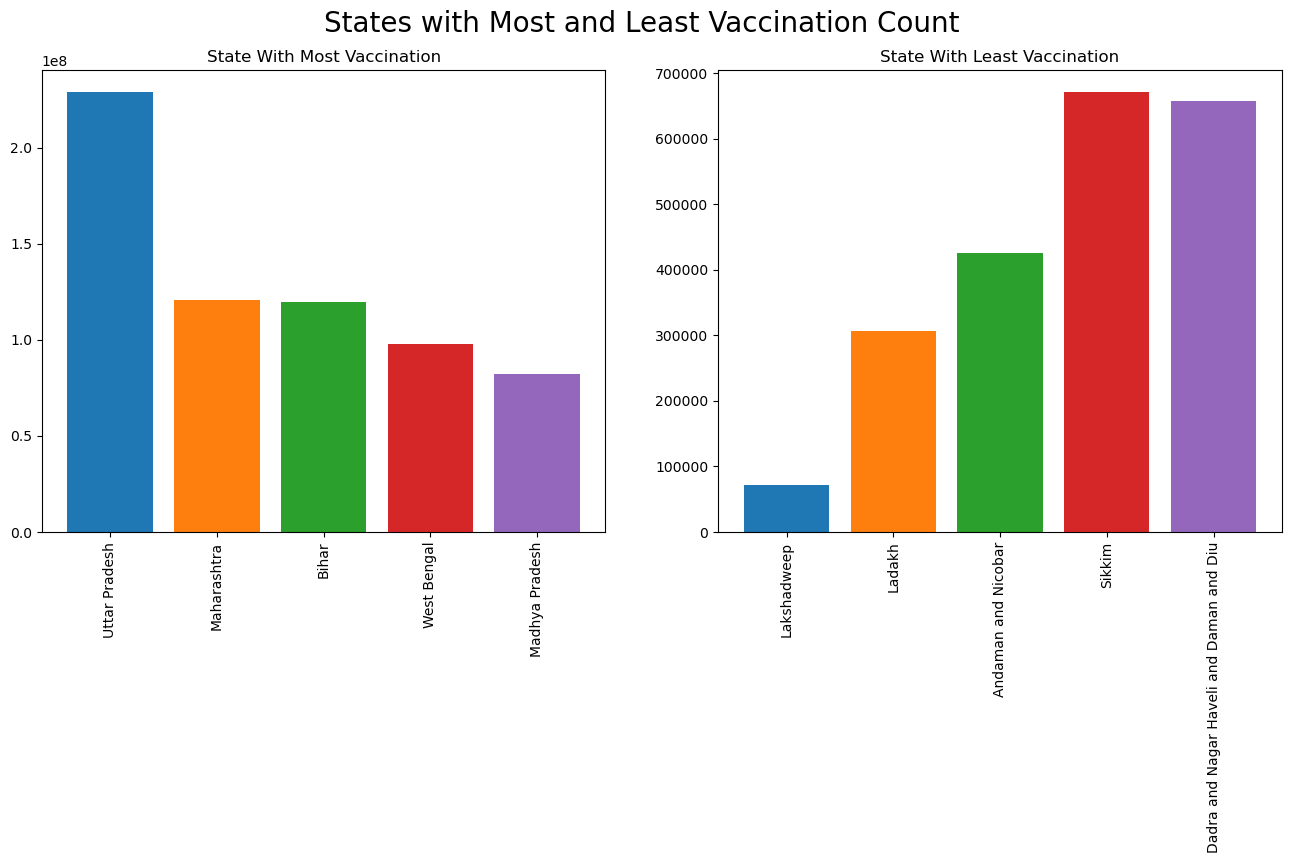

In [16]:
# States according to the doses 
state_dose_most = covid.sort_values(by='total_doses',ascending=False)['state'].values[:5]
state_popu_most = covid.sort_values(by='total_doses',ascending=False)['population'].values[:5]

state_popu_least = covid.sort_values(by='total_doses')['population'].values[:5]
state_dose_least = covid.sort_values(by='total_doses')['state'].values[:5]

fig,ax = plt.subplots(1,2,figsize=(16,6))
fig.suptitle("States with Most and Least Vaccination Count",fontsize=20)
colr = sns.color_palette('tab10')
ax[0].set_title('State With Most Vaccination')
ax[0].bar(state_dose_most,state_popu_most,color=colr)
ax[1].set_title('State With Least Vaccination')
ax[1].bar(state_dose_least,state_popu_least,color=colr)
ax[1].set_xticklabels(state_dose_least,rotation=90)
ax[0].set_xticklabels(state_dose_most,rotation=90)

plt.show()

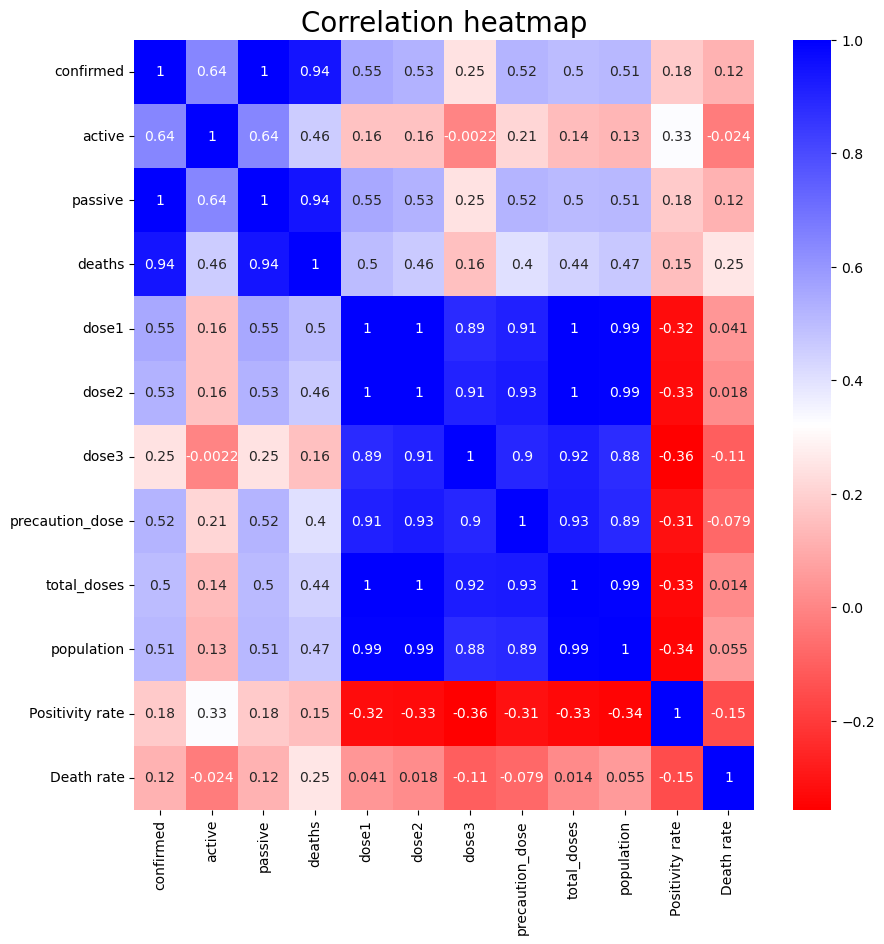

In [17]:
# heatmap 
plt.figure(figsize=(10,10))
sns.heatmap(covid.corr(),cmap='bwr_r',annot=True)
plt.title('Correlation heatmap',fontsize=20)
plt.show()

---

### Conclusion 

- The state with the dense population have the higher confirmed cases and higher death ratio in comparision to others state
- The state with higher population have the higher amount of the vaccination 
- Vaccination of Dose1, Dose2 is done among the approx 65% of population 
- Vaccination of Dose3, Precaution Dose is done among the only 20% of population  
- Dose1 and Dose2 is highly correlated to the population 

